In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

import warnings
warnings.filterwarnings("ignore")

In [2]:
from tqdm import trange

In [3]:
from collections import Counter

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
df=pd.read_excel("C:/Users/anupsv/Hotel Reviews/hotel_reviews.xlsx")

In [6]:
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...     4.0
1  ok nothing special charge diamond member hilto...     2.0
2  nice rooms not 4* experience hotel monaco seat...     3.0
3  unique, great stay, wonderful time hotel monac...     5.0
4  great stay great stay, went seahawk game aweso...     5.0

In [7]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [8]:
df['Rating'].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

In [9]:
class_dist = df['Rating'].value_counts()

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

In [10]:
ditribution_plot(x= class_dist.index, y= class_dist.values, name= 'Class Distribution')

In [11]:
pos = [5,4] 
neg = [1, 2]
neu = [3] 

def sentiment(rating):
    if rating in pos: 
        return 'Positive' 
    elif rating in neg:
        return 'Negative' 
    else:
        return 'Neutral'

df['Setiment'] = df['Rating'].apply(sentiment)

In [12]:
def convert_lower(text):
    return text.lower()

df['Review'] = df['Review'].apply(convert_lower)

In [13]:
def remove_special(text):
    T = ''
    for i in text:
        if i.isalpha():
            T = T+i 
        else: 
            T = T+ ' '
    return T 

df['Review'] = df['Review'].apply(remove_special)

In [14]:
nltk.download('stopwords')

def remove_stopwords(text):
    S = []
    for i in text.split():
        if i not in stopwords.words('english'):
            S.append(i) 
    W = S[:]
    S.clear()
    return W 

df['Review'] = df['Review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anupsv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

x  = []
def lemmatize_words(text):
    for i in text: 
        x.append(lemmatizer.lemmatize(i)) 
    y = x[:]
    x.clear()
    return y 

df['Review'] = df['Review'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anupsv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anupsv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
def join_text(text):
    return " ".join(text)

df['Review'] = df['Review'].apply(join_text)

In [17]:
df.head()

Review  Rating  Setiment
0  nice hotel expensive parking got good deal sta...     4.0  Positive
1  ok nothing special charge diamond member hilto...     2.0  Negative
2  nice room experience hotel monaco seattle good...     3.0   Neutral
3  unique great stay wonderful time hotel monaco ...     5.0  Positive
4  great stay great stay went seahawk game awesom...     5.0  Positive

In [18]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show() 

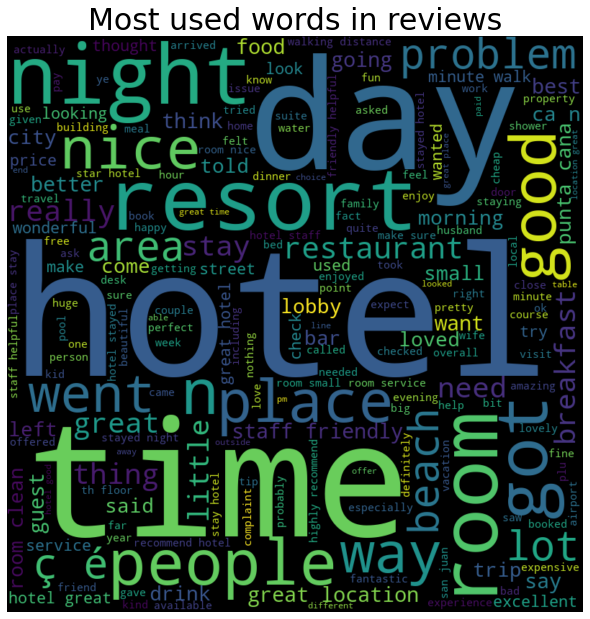

In [19]:
wordCloud_generator(df['Review'], title="Most used words in reviews")

In [20]:
df_5=df[df["Rating"]==5]
df_5

Review  Rating  Setiment
3      unique great stay wonderful time hotel monaco ...     5.0  Positive
4      great stay great stay went seahawk game awesom...     5.0  Positive
5      love monaco staff husband stayed hotel crazy w...     5.0  Positive
6      cozy stay rainy city husband spent night monac...     5.0  Positive
8      hotel stayed hotel monaco cruise room generous...     5.0  Positive
...                                                  ...     ...       ...
20473  best best reason affordable better hotel city ...     5.0  Positive
20476  night trust disappointed stay hotel say best w...     5.0  Positive
20480  great play stay stay loyal inn package deal ha...     5.0  Positive
20482  great choice wife chose best western quite bit...     5.0  Positive
20486  best kept secret rd time staying charm star ca...     5.0  Positive

[9054 rows x 3 columns]

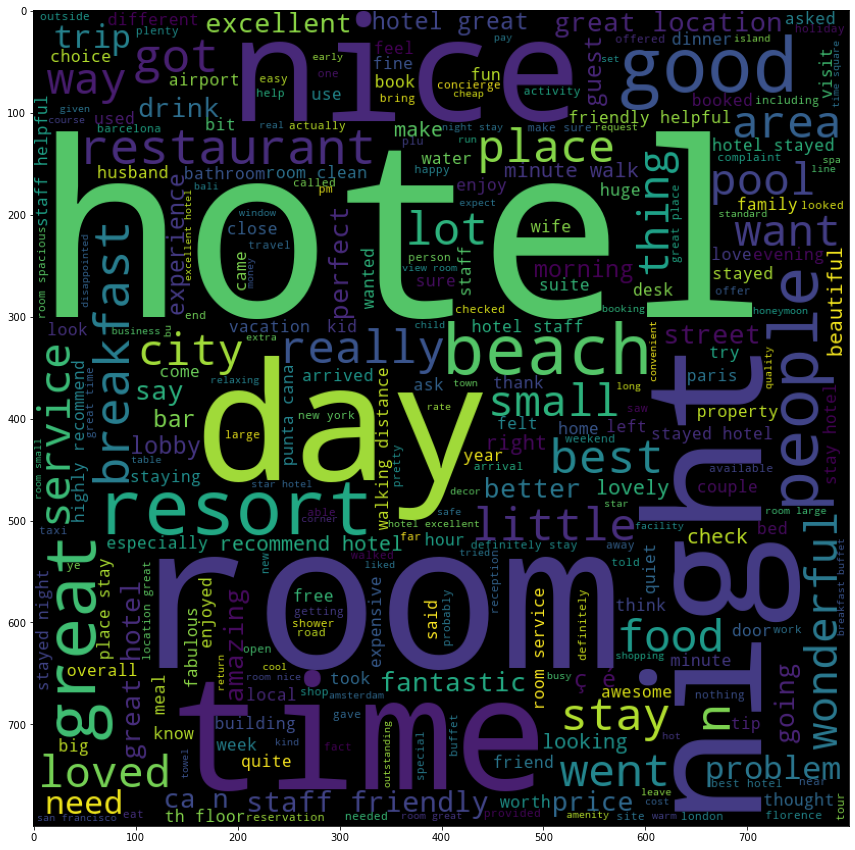

In [21]:
# the highest work repeat in the review rating 5

plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="black").generate(' '.join(df_5['Review']))

plt.imshow(wc1)

### With 5 star Rating we see the frquently used words are : -

##### hotel - room - night - beach - Resort and food and drink - bed - pool - locations.

In [22]:
df_4=df[df["Rating"]==4]

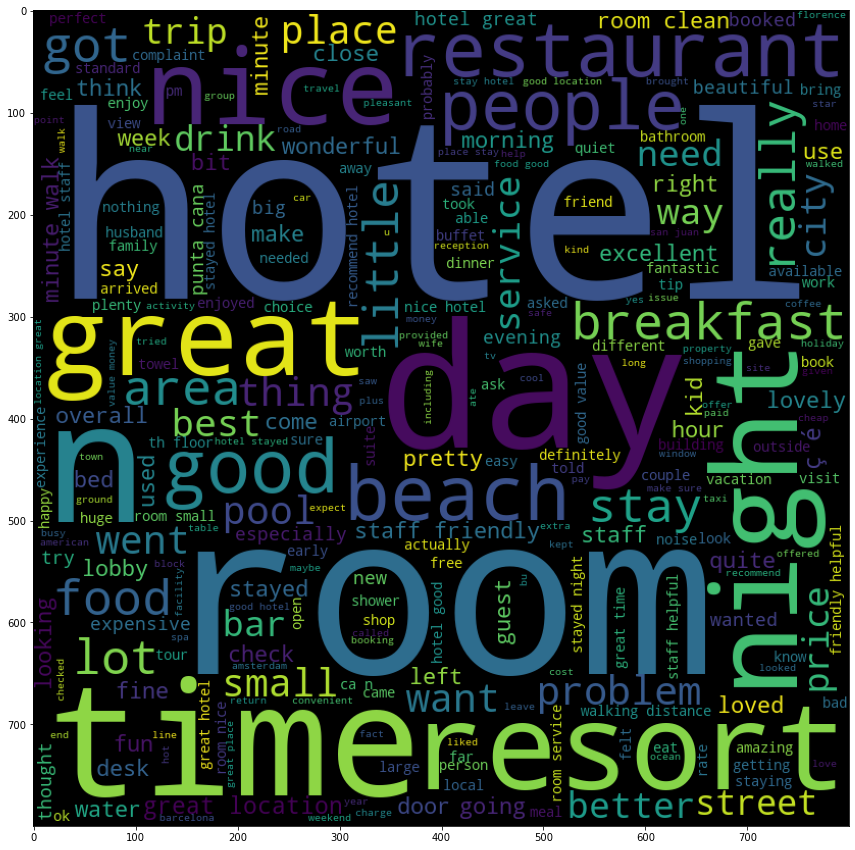

In [23]:
# the highest work repeat in the review rating 4

plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="black").generate(' '.join(df_4['Review']))

plt.imshow(wc2)

### With 4 star Rating we see the frquently used words are

#### beautiful hotel - staff friendly - service - street.

In [24]:
df_3=df[df["Rating"]==3]

In [25]:
df_2=df[df["Rating"]==2]

In [26]:
df_1=df[df["Rating"]==1]

## Rating 5 = 44% -> satisfy

### hotel - room - night - beach - restaurant and food and drink - bed - pool - locations.

## Rating 4 = 30% -> satisfy

### staff friendly - service - street.

## Rating 2 = 9% -> unsatisfied

### Hotel - staff - beach - srevice - disk - stay - shower

## Rating 1 = 7% -> unsatisfied

### hotel - place - staff - door - check in - sleep - toilet - resort -water.

### We see around 75 % from visitors satisfied

In [27]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night'

In [28]:
def corpus(text):
    text_list = text.split()
    return text_list

In [29]:
df['Review_lists'] = df['Review'].apply(corpus)
df.head(10)

Review  Rating  Setiment  \
0  nice hotel expensive parking got good deal sta...     4.0  Positive   
1  ok nothing special charge diamond member hilto...     2.0  Negative   
2  nice room experience hotel monaco seattle good...     3.0   Neutral   
3  unique great stay wonderful time hotel monaco ...     5.0  Positive   
4  great stay great stay went seahawk game awesom...     5.0  Positive   
5  love monaco staff husband stayed hotel crazy w...     5.0  Positive   
6  cozy stay rainy city husband spent night monac...     5.0  Positive   
7  excellent staff housekeeping quality hotel cho...     4.0  Positive   
8  hotel stayed hotel monaco cruise room generous...     5.0  Positive   
9  excellent stayed hotel monaco past w e delight...     5.0  Positive   

                                        Review_lists  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, room, experience, hotel, monaco, seattl...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...  
5  [love, monaco, staff, husband, stayed, hotel, ...  
6  [cozy, stay, rainy, city, husband, spent, nigh...  
7  [excellent, staff, housekeeping, quality, hote...  
8  [hotel, stayed, hotel, monaco, cruise, room, g...  
9  [excellent, stayed, hotel, monaco, past, w, e,...

In [30]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 157481.99it/s]


2039171

In [31]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 54050),
 ('room', 47779),
 ('great', 21485),
 ('n', 19105),
 ('good', 17491),
 ('staff', 16706),
 ('stay', 15601),
 ('night', 14577),
 ('day', 13484),
 ('time', 12981)]

In [53]:
df_R=df['Review'].head(10000)

In [54]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_R)

In [55]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

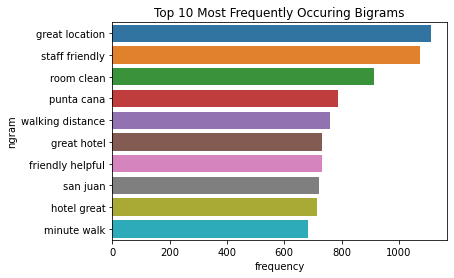

In [56]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()